In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Model parameteres
ms = 50.
g =9.81 #m/s2
rho = 1.091 #kg/m^3
r = 0.5 #m
A = numpy.pi*r**2
ue = 325. #m/s
Cd = 0.15
mp = 100. #kg
mpdot = 20. #burn rate

#Initial conditions
h0 = 0. #initial height
v0 =0.  #initial velocity


In [3]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]

    return numpy.array([v,-g +(mpdot*ue)/(ms+mp) - \
                        (0.5*rho*v*abs(v)*A*Cd)/(ms +mp)])

In [4]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

We know that until 5 seconds the burn rate is 20kg/s. Starting from 5 seconds, it drops to 0.

In [5]:
T = 40.   
dt =0.1
N = int(T/dt)+1  
t = numpy.linspace(0.0,T,N) 
u = numpy.empty((N,2))
u[0] = numpy.array([h0,v0])



In [6]:
def fuelmass(h0,v0):
   
    global mp,mpdot
    for n in range(N-1):
        mp=mp-(mpdot*dt)
        if (mp<=0):
            mp = 0
            mpdot = 0
        u[n+1]=euler_step(u[n], f, dt)
        print (n, u[n+1,0])
    return u,t,n

In [7]:
[u,t,n] =fuelmass(h0,v0)
h= u[0:n,0]
v= u[0:n,1]
t= t[0:n]

0 0.0
1 0.341089189189
2 1.02923264734
3 2.0704536594
4 3.47083049854
5 5.23649285467
6 7.37361788574
7 9.88842586763
8 12.7871754181
9 16.0761582687
10 19.7616935581
11 23.8501216192
12 28.3477972313
13 33.2610823083
14 38.5963379932
15 44.3599161278
16 50.5581500666
17 57.1973448044
18 64.2837663845
19 71.8236305574
20 79.8230906569
21 88.288224664
22 97.225021428
23 106.639366014
24 116.537024153
25 126.923625761
26 137.804647509
27 149.185394424
28 161.070980496
29 173.466308277
30 186.376047471
31 199.804612497
32 213.756139031
33 228.234459532
34 243.243077769
35 258.785142364
36 274.86341938
37 291.480264004
38 308.637591361
39 326.336846525
40 344.578973811
41 363.364385407
42 382.692929479
43 402.563857833
44 422.975793286
45 443.926696876
46 465.413835083
47 487.433747234
48 509.982213283
49 533.054222187
50 555.343941108
51 576.896980378
52 597.754852836
53 617.955452663
54 637.533465861
55 656.520723798
56 674.94650909
57 692.83782135
58 710.219608984
59 727.114972139
60 74

In [30]:
for n in range(N-1):
    if (u[n+1,0])<0:
        flightend = n*dt
        print('flightend = %a' %flightend)
        endvelocity = (u[n+1,1])
        print('velocity at end of flight = %ab' %endvelocity)
        break

flightend = 36.7
velocity at end of flight = -85.949748032568777b


In [39]:
vmax =v.argmax()
print(v[vmax])
print((vmax+1)*dt)
print(h[vmax])

230.720089047
5.0
509.982213283


1316.62009418
156
15.7


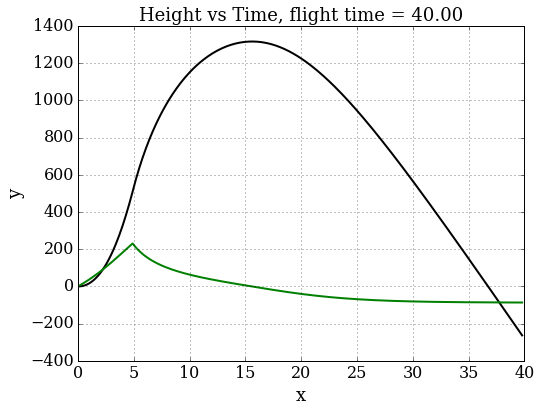

In [40]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.xlim(0,T)
#pyplot.ylim(0, 1500)
pyplot.title('Height vs Time, flight time = %.2f' % T, fontsize=18)
pyplot.plot(t,h, 'k-', lw=2);
pyplot.plot(t,v, 'g-', lw=2);
hmax = h.argmax()
print(h[hmax])
print(hmax)
print((hmax+1)*dt)